In [1]:
import tensorboard as tb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
experiment_id_tabnet = 'oYB2aPfzTQmXj07sJ7KOFg'
experiment_id_linear = 'JnDDBWSgQPag4qWXJKb0bg'
experiment_tabnet = tb.data.experimental.ExperimentFromDev(experiment_id_tabnet)
experiment_linear = tb.data.experimental.ExperimentFromDev(experiment_id_linear)
data_tabnet = experiment_tabnet.get_scalars()
data_linear = experiment_linear.get_scalars()

In [3]:
LINEAR = [f'linear_{i}_final' for i in range(1, 5)]
TABNET = [f'w_augment_{i}' for i in range(1, 6)]

In [4]:
def get_data(data, versions, columns):
    dfs = []
    for version in versions:
        if isinstance(version, str):
            version = [version]
        dfs.append(
            data[data.run.isin(version)]
            .drop_duplicates(subset=['step', 'tag'], keep='last')
            .pivot(index='step', columns='tag', values='value')
            [columns]
            .dropna()
            .assign(version=version[0])
        )
        
    return pd.concat(dfs)


val_cols = ['epoch', 'val_loss', 'val_f1_macro']
df_tabnet = get_data(data_tabnet, TABNET, val_cols).assign(model='TabNet')
df_linear = get_data(data_linear, LINEAR, val_cols).assign(model='Linear')

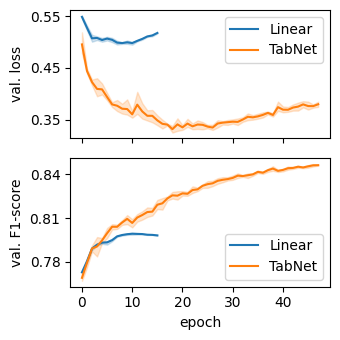

In [10]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(3.5, 3.5))

sns.lineplot(x='epoch', y='val_loss', hue='model', data=pd.concat([df_linear, df_tabnet]), ax=axs[0])
axs[0].set_ylabel('val. loss')
axs[0].legend(title='')
axs[0].set_yticks([0.35, 0.45, 0.55])

sns.lineplot(x='epoch', y='val_f1_macro', hue='model', data=pd.concat([df_linear, df_tabnet]), ax=axs[1])
axs[1].set_ylabel('val. F1-score')
axs[1].legend(title='')
axs[1].set_yticks([0.78, 0.81, 0.84])

plt.tight_layout()
plt.savefig('/dss/dsshome1/04/di93zer/git/cellnet/figure-plots/figure1/val_loss_tabnet_vs_linear.pdf')
plt.savefig('/dss/dsshome1/04/di93zer/git/cellnet/figure-plots/figure1/val_loss_tabnet_vs_linear.png', dpi=300)